# Tabular example

In [1]:
from fastai import *          # Quick accesss to most common functionality
from fastai.tabular import *  # Quick accesss to tabular functionality     # Access to example data provided with fastai

Tabular data should be in a Pandas `DataFrame`.

In [2]:
path = Path('/mnt/datadrive1/h216520/fastai_v3/data/housesalesprediction')
df = pd.read_csv(path/'kc_house_data.csv')

In [3]:
df.head(); df.columns; df.shape

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

(21613, 21)

In [7]:
train = df
summ = pd.DataFrame({'Variable':train.columns.values,
                   'dtype':train.dtypes.values,
                   'n_missing':[train[col].shape[0]-train[col].dropna().shape[0] for col in train.columns],
                   'perc_missing':[(train[col].shape[0]-train[col].dropna().shape[0])*100/train[col].shape[0] for col in train.columns],
                   'unique_cnt' : [len(train[col].unique()) for col in train.columns],
                   'unique_values': [(train[col].unique()) if (len(train[col].unique())<10) else 'UniqueVals>10' for col in train.columns]},
                   index=np.arange(train.shape[1]))
summ

,Variable,dtype,n_missing,perc_missing,unique_cnt,unique_values
0,id,int64,0,0.0,21436,UniqueVals>10
1,date,object,0,0.0,372,UniqueVals>10
2,price,float64,0,0.0,4028,UniqueVals>10
3,bedrooms,int64,0,0.0,13,UniqueVals>10
4,bathrooms,float64,0,0.0,30,UniqueVals>10
5,sqft_living,int64,0,0.0,1038,UniqueVals>10
6,sqft_lot,int64,0,0.0,9782,UniqueVals>10
7,floors,float64,0,0.0,6,"[1.0, 2.0, 1.5, 3.0, 2.5, 3.5]"
8,waterfront,int64,0,0.0,2,"[0, 1]"
9,view,int64,0,0.0,5,"[0, 3, 4, 2, 1]"


In [8]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
dep_var = 'price'
cat_names = ['waterfront', 'view', 'condition', 'grade']
cont_names = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 
              'yr_renovated', 'sqft_living15', 'sqft_lot15']
procs = [FillMissing, Categorify, Normalize]

In [10]:
path

PosixPath('/mnt/datadrive1/h216520/fastai_v3/data/housesalesprediction')

In [5]:
test = TabularList.from_df(df.iloc[19000:21613].copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [10]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(19000,21613)))
                           .label_from_df(cols=dep_var)
                           .add_test(test, label=0)
                           .databunch())

In [7]:
data.show_batch(rows=10)

waterfront,view,condition,grade,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,target
0,2,3,9,1.7525,1.5649,1.7371,-0.2432,1.1131,2.3221,-0.6736,1.2799,-0.2189,1.9169,-0.2855,856000.0
0,0,3,7,-0.3874,0.5778,-0.0787,-0.2669,1.1131,0.2872,-0.6736,1.6015,-0.2189,0.3398,-0.3223,317950.0
0,0,4,9,0.6825,0.5778,0.4306,-0.1351,1.1131,0.8580,-0.6736,0.7797,-0.2189,1.2622,-0.1757,672000.0
0,0,4,7,-1.4574,-0.0803,-0.1672,-0.1899,-0.8485,-0.7426,0.9962,-1.5783,-0.2189,-1.2372,-0.2030,450000.0
0,2,3,12,-0.3874,1.8939,2.7778,-0.0267,1.1131,3.4884,-0.6736,0.8155,-0.2189,3.0922,0.0357,1490000.0
0,2,3,8,-2.5274,-0.0803,1.0506,4.4919,2.0938,1.5528,-0.6736,0.4225,-0.2189,0.5332,7.3524,415000.0
0,0,3,8,-0.3874,0.5778,-0.2005,-0.2444,1.1131,0.1508,-0.6736,1.2799,-0.2189,0.0423,-0.2050,445830.0
0,0,3,7,-0.3874,-1.3964,-1.1415,-0.1814,-0.8485,-0.9039,-0.6736,-0.4707,-0.2189,-1.4158,-0.1898,229000.0
0,0,5,7,1.7525,-0.0803,0.3863,-0.1472,-0.8485,-0.6681,1.9759,-0.2921,-0.2189,-0.3148,-0.1370,390000.0
0,0,4,8,-0.3874,0.2488,-0.4883,-0.2055,-0.8485,-0.5813,0.0611,0.0295,-0.2189,0.2952,-0.1749,218000.0


In [11]:
data = (TabularList.from_df(df, path=path, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(19000,21613)))
                           .label_from_df(cols=dep_var)
                           .add_test(test, label=0)
                           .databunch())

In [13]:
learn.model

TabularModel(
  (embeds): ModuleList()
  (emb_drop): Dropout(p=0.0)
  (bn_cont): BatchNorm1d(11, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=11, out_features=20, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=20, out_features=10, bias=True)
    (4): ReLU(inplace)
    (5): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=10, out_features=1, bias=True)
  )
)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


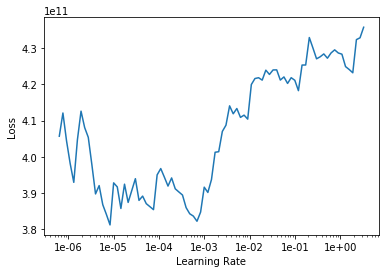

In [12]:
learn = tabular_learner(data, layers=[20,10])#, metrics=accuracy)
learn.lr_find()
learn.recorder.plot()

In [30]:
learn.fit(5, 1e-8)

Total time: 00:07
epoch  train_loss  valid_loss                  
1      425562046464.000000  480042614784.000000  (00:01)
2      435263340544.000000  480042680320.000000  (00:01)
3      402318393344.000000  480042713088.000000  (00:01)
4      445590896640.000000  480042680320.000000  (00:01)
5      405195980800.000000  480042713088.000000  (00:01)



## Inference

In [10]:
row = df.iloc[0]

In [11]:
learn.predict(row)

(0, tensor(1), tensor([0.4560, 0.5440]))